# Oscars - Premios de la Academia

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from statistics import median

## Datos
Cada año se otorgan Óscares a la mejor actriz y al mejor actor. 
+ Se presenta una listas (actrices y actores) con las edades de los galardonados en el momento de la ceremonia de entrega de los premios. 
+ Las edades aparecen en orden, empezando con la primera ceremonia de los Premios de la Academia en 1928. 
    + [Notas: 
        + En 1968 hubo un empate en la categoría de mejor actriz, y se utilizó el promedio (la media) de las dos edades; 
        + En 1932 hubo un empate en la categoría de mejor actor, y se utilizó el promedio (la media) de las dos edades. 
        + Tales datos se basan en el artículo “Ages of Oscar-winning Best Actors and Actresses”, de Richard Brown y Gretchen Davis, en la revista Mathematics Teacher. 
            + En ese artículo, el año de nacimiento del ganador del premio se restó del año de la ceremonia; 
            + no obstante, las edades de las listas se basan en la fecha de nacimiento del ganador y en lafecha de la ceremonia de premiación].

In [2]:
# Datos proporcionados
edades_actrices = [22, 37, 28, 63, 32, 26, 31, 27, 27, 28, 30, 26, 29, 24, 38, 25, 29, 41, 30, 35,
                   35, 33, 29, 38, 54, 24, 25, 46, 41, 28, 40, 39, 29, 27, 31, 38, 29, 25, 35, 60,
                   43, 35, 34, 34, 27, 37, 42, 41, 36, 32, 41, 33, 31, 74, 33, 50, 38, 61, 21, 41,
                   26, 80, 42, 29, 33, 35, 45, 49, 39, 34, 26, 25, 33, 35, 35, 28]

edades_actores = [44, 41, 62, 52, 41, 34, 34, 52, 41, 37, 38, 34, 32, 40, 43, 56, 41, 39, 49, 57,
                  41, 38, 42, 52, 51, 35, 30, 39, 41, 44, 49, 35, 47, 31, 47, 37, 57, 42, 45, 42,
                  44, 62, 43, 42, 48, 49, 56, 38, 60, 30, 40, 42, 36, 76, 39, 53, 45, 36, 62, 43,
                  51, 32, 42, 54, 52, 37, 38, 32, 45, 60, 46, 40, 36, 47, 29, 43]

## Situación de consulta
La pregunta básica que consideraremos es: 
+ ¿Hay diferencias importantes entre las edades de las mejores actrices y las edades de los mejores actores? 
    + ¿Al parecer los actores y las actrices son juzgados estrictamente por sus habilidades artísticas? 
        + O bien, ¿existe discriminación por la edad y las mejores actrices suelen ser más jóvenes que los mejores actores? 
        + ¿Hay algunas otras diferencias evidentes? 
+ A demás de ser interesante..., 
+ Esto es importante porque nos brinda información sobre la forma en que nuestra sociedad percibe a los hombres y a las mujeres en general.


# Procedimiento
+ Primero hay una exploración con analisis preliminar y primera conclusión.
+ Luego un analisis avanzado con Medidas de Tendencia Central, Medicas de Variación, Cuartiles, Regla de 68, 95, 99.7 (1S, 2S, 3S), Mínimos y Máximos
1. Construcción de un dataframe con los estadísticos de describe() tendencia central y dispersión.
2. Construcción de un dataframe con los estadísticos de dos desvíaciones estandar (2S = 95% de los datos en normal)
3. Construcción de un dataframe con los valores de las puntas de bigotes o whiskers y los outliers
4. Calculo de cantidades de observaciones dentro de boxes y fuera de los mismos
5. Construcción de un dataframe con 1, 2 y 3.
5. Ordenamiento de las columnas para analizar.

## Analisis de los datos
### Construcción de un dataframe con las edades, genero y rangos
Armado de una lista con edad genero y rango de edades por décadas

In [3]:
# Crear el DataFrame
datos = {
    'Edad': edades_actrices + edades_actores,
    'Género': ['Actriz'] * len(edades_actrices) + ['Actor'] * len(edades_actores)
}
df = pd.DataFrame(datos)

# Crear bins para las edades con cut
# https://pandas.pydata.org/docs/reference/api/pandas.cut.html
bins = [20, 30, 40, 50, 60, 70, 80, 90]
labels = ['21–30', '31–40', '41–50', '51–60', '61–70', '71–80', '81–90']
df['Rango de Edad'] = pd.cut(df['Edad'], bins=bins, labels=labels, right=False)
df

,Edad,Género,Rango de Edad
0,22,Actriz,21–30
1,37,Actriz,31–40
2,28,Actriz,21–30
3,63,Actriz,61–70
4,32,Actriz,31–40
...,...,...,...
147,40,Actor,41–50
148,36,Actor,31–40
149,47,Actor,41–50
150,29,Actor,21–30


## Construcción de la distirbuciones de frecuencias
A partir de la lista anterior se construye una tabla con las distribuciones de frencuencias por rango de edad.
+ Tanto para Actrices como Actores

In [4]:

# Crear la tabla de frecuencias con crosstab
# https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html
tabla_frecuencias = pd.crosstab(df['Rango de Edad'], df['Género'])

# Mostrar la tabla de frecuencias
tabla_frecuencias


Género,Actor,Actriz
Rango de Edad,,
21–30,1,26
31–40,24,31
41–50,33,12
51–60,12,2
61–70,5,3
71–80,1,1
81–90,0,1


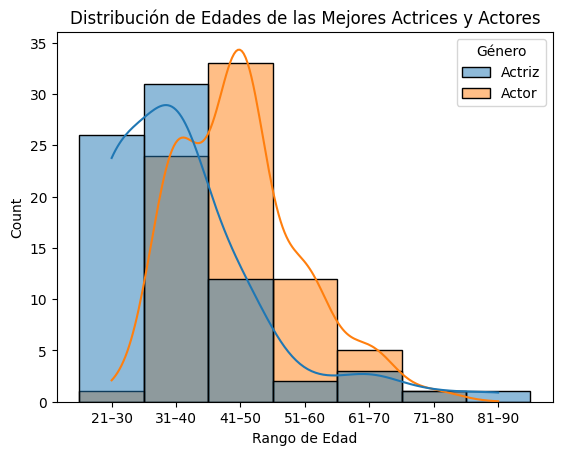

In [5]:
# Crear el gráfico a partir de la versión extendida
# Es decir del dataframe df
# plt.figure(figsize=(12, 6))
sns.histplot(df, x='Rango de Edad', hue='Género', kde=True)

# Añadir título y etiquetas
plt.title('Distribución de Edades de las Mejores Actrices y Actores')

# Mostrar el gráfico
plt.show()

###### sns.histplot(df, x='Rango de Edad', hue='Género', palette='pastel')
De las cantidades y su solapamiento se observa:
+ Una mayor cantidad de mujeres que de hombres ganan el Oscar a edades entre 20 y 40 años.
+ Una mayor cantidad de hombres que de mujeres ganan el Oscar a dedades entre 41 y 70.
+ Igual cantindad de hombres y mujeres entre 71 y 80.
+ Solo un hombre entre 81 y 90 ha ganado el Oscar.

De las cantidades acumuladas o solapadas s observa:
+ La cantidad total de Oscars crece con la edad desde los 21 hasta los 50 años y luego decrece hasta los 90 años.
+ Ganan mujeres +-26 a 1 en rango (21-30), Ganan Hombres +-12 a 2 en (51-60)
+ 1 iguales en 71-80

<Axes: xlabel='Rango de Edad', ylabel='Probability'>

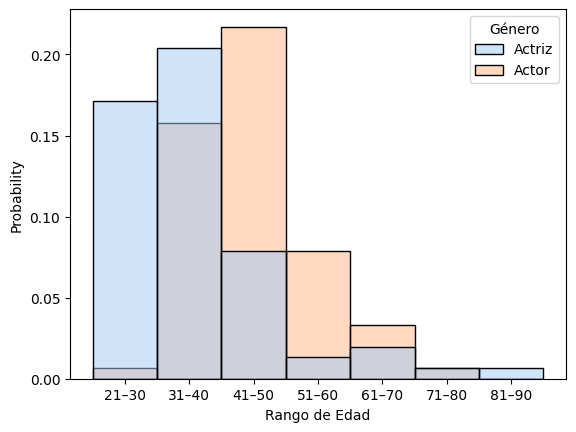

In [6]:
sns.histplot(df, x='Rango de Edad', hue='Género', stat='probability', palette='pastel')

<Axes: xlabel='Rango de Edad', ylabel='Count'>

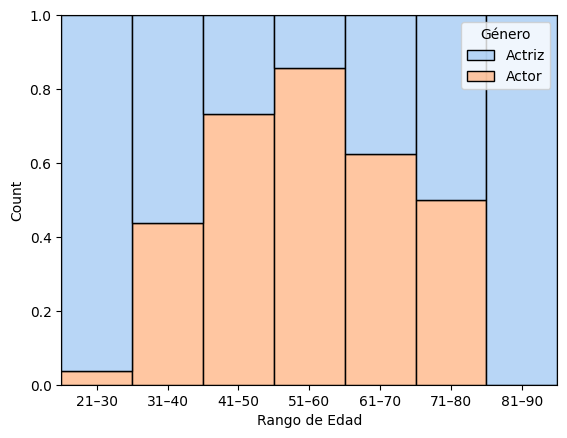

In [7]:
sns.histplot(df, x='Rango de Edad', hue='Género', multiple='fill', palette='pastel')

# Del grafico de fill, o porcentajes en cada rango se observa aproximamente:
+ El rango 21-30 es 99/10 la proporción mujeres/hombres (aprox)
+ El rango 31-40 es 58/42 la proporción mujeres/hombres (aprox)
+ El rango 41-50 es 24/76 la proporción mujeres/hombres (aprox)
+ El rango 51-60 es 18/82 la proporción mujeres/hombres (aprox)
+ El rango 61-70 es 40/60 la proporción mujeres/hombres (aprox)
+ El rango 71-80 es 50/50 la proporción mujeres/hombres (aprox)
+ El rango 81-90 es 0/100 la proporción mujeres/hombres (aprox)

<Axes: xlabel='Rango de Edad'>

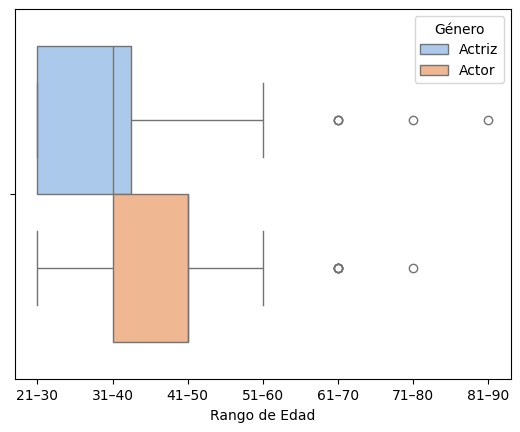

In [8]:
sns.boxplot(df, x='Rango de Edad', hue='Género', palette='pastel')

<Axes: xlabel='Rango de Edad', ylabel='Count'>

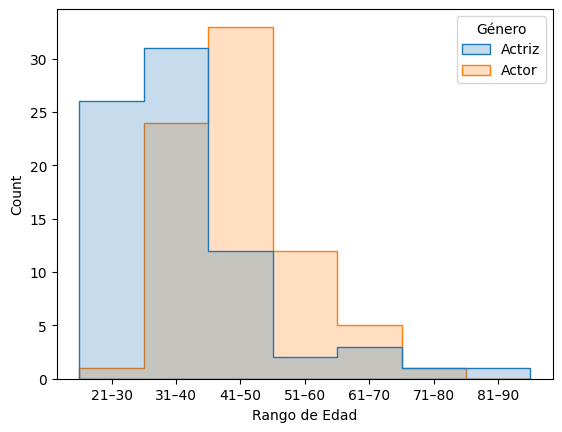

In [9]:
sns.histplot(df, x='Rango de Edad', hue='Género', element='step')

<Axes: xlabel='Rango de Edad', ylabel='Count'>

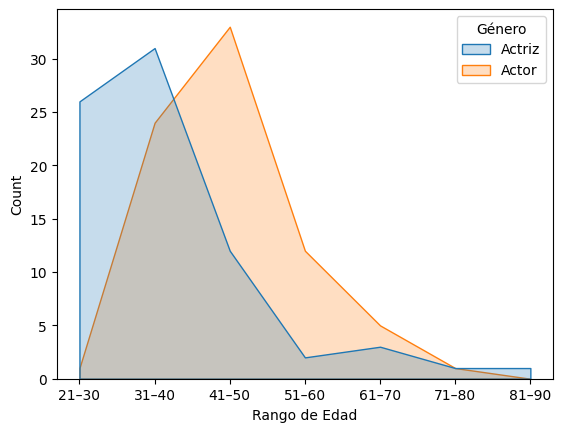

In [10]:
sns.histplot(df, x='Rango de Edad', hue='Género', element='poly')

<Axes: xlabel='Rango de Edad', ylabel='Count'>

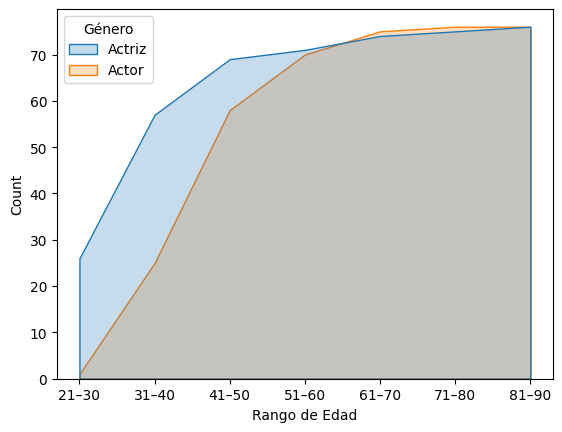

In [11]:
sns.histplot(df, x='Rango de Edad', hue='Género', cumulative=True, element='poly')

<Axes: xlabel='Rango de Edad', ylabel='Count'>

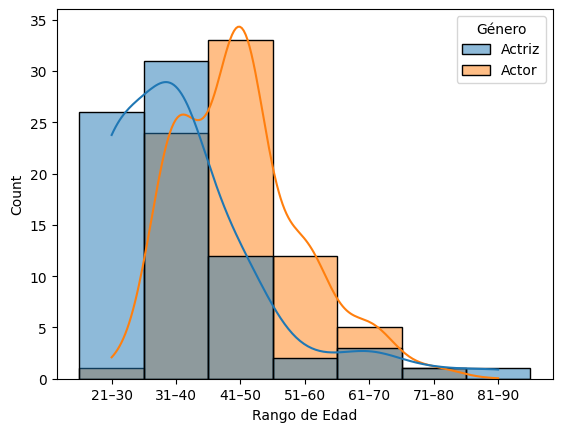

In [12]:
sns.histplot(df, x='Rango de Edad', hue='Género', kde=True)

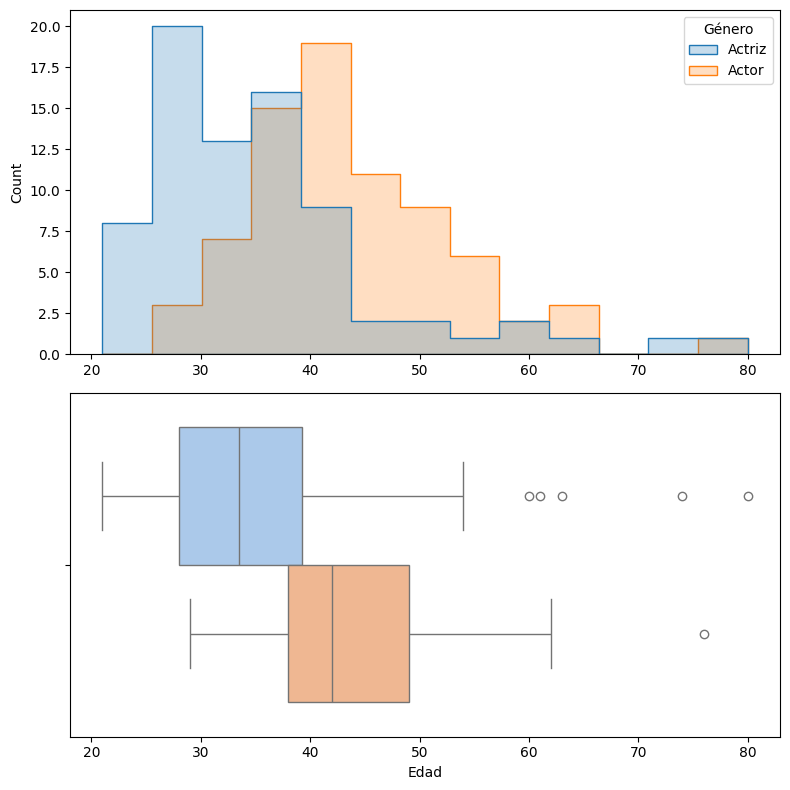

In [13]:
plt.figure(figsize=(8, 8))
ax1 = plt.subplot(211)
sns.histplot(df, x='Edad', hue='Género', element='step')
plt.xlabel('')
    
ax2 = plt.subplot(212)
sns.boxplot(df, x='Edad', hue='Género', palette='pastel', legend=False)

# Alinear los ejes x
ax2.set_xlim(ax1.get_xlim())

# Ajustar el diseño
plt.tight_layout()
plt.show()

In [14]:
# Verificar estadísticos descriptivos
print(df.groupby('Género').describe())

        Edad                                                     
       count       mean        std   min   25%   50%    75%   max
Género                                                           
Actor   76.0  43.947368   9.064061  29.0  38.0  42.0  49.00  76.0
Actriz  76.0  35.684211  11.063707  21.0  28.0  33.5  39.25  80.0


In [15]:
median(edades_actrices), median(edades_actores)

(33.5, 42.0)

Determinar los límites para los outliers:

Los límites para identificar los outliers se establecen como:
Límite inferior = Q1 - 1.5 * IQR
Límite superior = Q3 + 1.5 * IQR

In [16]:

# Calcular cuartiles y whiskers para actrices
Q1_actrices = df[df['Género'] == 'Actriz']['Edad'].quantile(0.25)
Q2_actrices = df[df['Género'] == 'Actriz']['Edad'].median()
Q3_actrices = df[df['Género'] == 'Actriz']['Edad'].quantile(0.75)
IQR_actrices = Q3_actrices - Q1_actrices
whisker_min_actrices = df.loc[df['Género'] == 'Actriz', 'Edad'][df['Edad'] >= Q1_actrices - 1.5 * IQR_actrices].min()
whisker_max_actrices = df.loc[df['Género'] == 'Actriz','Edad'][df['Edad'] <= Q3_actrices + 1.5 * IQR_actrices].max()

# Calcular cuartiles y whiskers para actores
Q1_actores = df[df['Género'] == 'Actor']['Edad'].quantile(0.25)
Q2_actores = df[df['Género'] == 'Actor']['Edad'].median()
Q3_actores = df[df['Género'] == 'Actor']['Edad'].quantile(0.75)
IQR_actores = Q3_actores - Q1_actores
whisker_min_actores = df.loc[df['Género'] == 'Actor']['Edad'][df['Edad'] >= Q1_actores - 1.5 * IQR_actores].min()
whisker_max_actores = df.loc[df['Género'] == 'Actor']['Edad'][df['Edad'] <= Q3_actores + 1.5 * IQR_actores].max()

# Identificar los outliers para actrices
outliers_actrices = df[df['Género'] == 'Actriz']['Edad'][(df['Edad'] < Q1_actrices - 1.5 * IQR_actrices) | (df['Edad'] > Q3_actrices + 1.5 * IQR_actrices)]

# Identificar los outliers para actores
outliers_actores = df[df['Género'] == 'Actor']['Edad'][(df['Edad'] < Q1_actores - 1.5 * IQR_actores) | (df['Edad'] > Q3_actores + 1.5 * IQR_actores)]

# Calcular cantidades dentro del box, whisker y diferencia para actrices
# a. cantidades dentro de boxes
box_Actriz = df.loc[df['Género'] == 'Actriz']['Edad'][(df['Edad'] >= Q1_actrices) & (df['Edad'] <= Q3_actrices)].count()
# b. cantiddes dentro de whiskers (incluye boxes)
whi_Actriz = df.loc[df['Género'] == 'Actriz']['Edad'][(df['Edad'] >= whisker_min_actrices) & (df['Edad'] <= whisker_max_actrices)].count()
# c. cantidades entre boxes y whiskers
wb_Acriz = whi_Actriz - box_Actriz

# Calcular cantidades dentro del box, whisker y diferencia para actores
box_Actor = df.loc[df['Género'] == 'Actor']['Edad'][(df['Edad'] >= Q1_actores) & (df['Edad'] <= Q3_actores)].count()
whi_Actor = df.loc[df['Género'] == 'Actor']['Edad'][(df['Edad'] >= whisker_min_actores) & (df['Edad'] <= whisker_max_actores)].count()
wb_Actor = whi_Actor- box_Actor

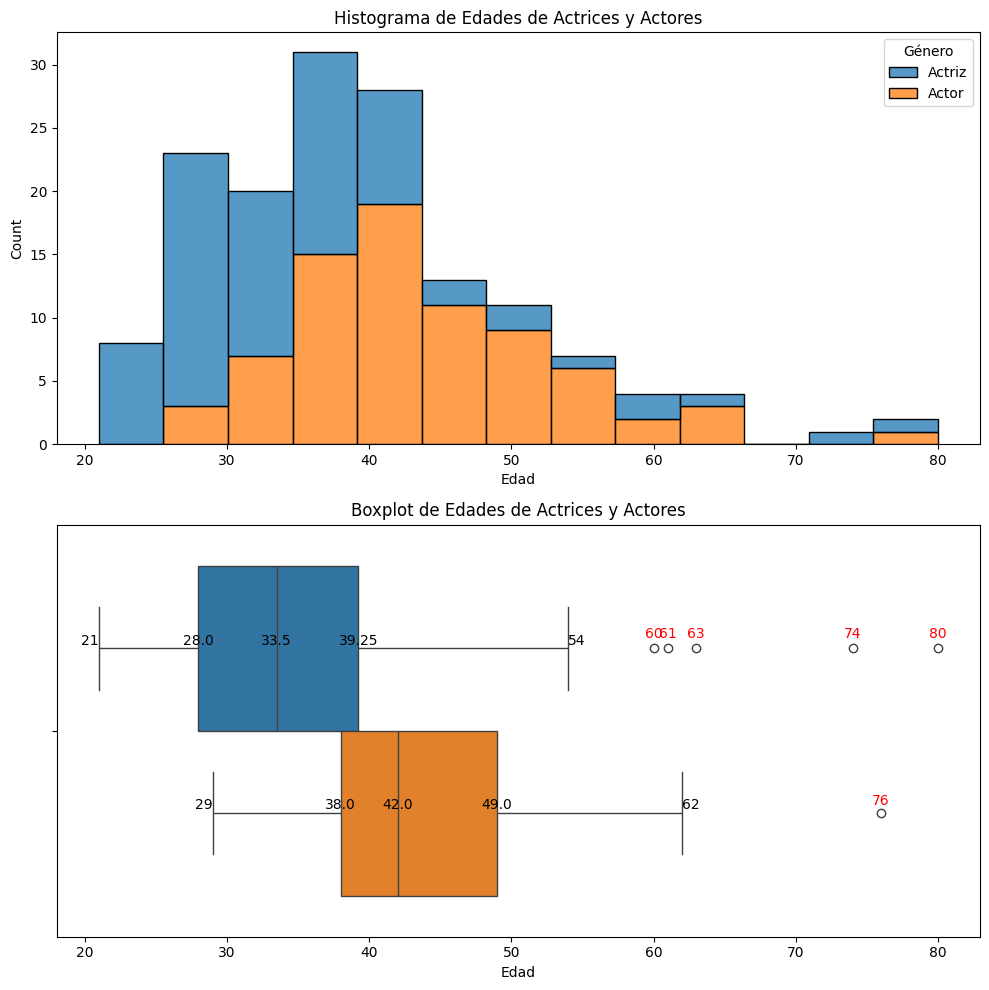

In [17]:

# Crear la figura con subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Histograma
sns.histplot(df, x='Edad', hue='Género', multiple='stack', ax=axes[0])
axes[0].set_title('Histograma de Edades de Actrices y Actores')

# Boxplot
sns.boxplot(data=df, x='Edad', hue='Género', legend=False, ax=axes[1])
axes[1].set_title('Boxplot de Edades de Actrices y Actores')
offset = 0.3  # Desplazamiento vertical

# Anotar los valores en el boxplot para actrices
axes[1].text(Q1_actrices, 0 - 0.2, f'{Q1_actrices}', horizontalalignment='center', verticalalignment='bottom', color='black', fontsize=10)
axes[1].text(Q2_actrices, 0 - 0.2, f'{Q2_actrices}', horizontalalignment='center', verticalalignment='bottom', color='black', fontsize=10)
axes[1].text(Q3_actrices, 0 - 0.2, f'{Q3_actrices}', horizontalalignment='center', verticalalignment='bottom', color='black', fontsize=10)
axes[1].text(whisker_min_actrices, 0 - 0.2, f'{whisker_min_actrices}', horizontalalignment='right', verticalalignment='bottom', color='black', fontsize=10)
axes[1].text(whisker_max_actrices, 0 - 0.2, f'{whisker_max_actrices}', horizontalalignment='left', verticalalignment='bottom', color='black', fontsize=10)
for outlier in outliers_actrices:
    axes[1].text(outlier, 0 - 0.225, f'{outlier}', horizontalalignment='center', color='red', fontsize=10)

# Anotar los valores en el boxplot para actores
axes[1].text(Q1_actores, 0 + 0.19, f'{Q1_actores}', horizontalalignment='center', color='black', fontsize=10)
axes[1].text(Q2_actores, 0 + 0.19, f'{Q2_actores}', horizontalalignment='center', color='black', fontsize=10)
axes[1].text(Q3_actores, 0 + 0.19, f'{Q3_actores}', horizontalalignment='center', color='black', fontsize=10)
axes[1].text(whisker_min_actores, 0 + 0.19, f'{whisker_min_actores}', horizontalalignment='right', color='black', fontsize=10)
axes[1].text(whisker_max_actores, 0 + 0.19, f'{whisker_max_actores}', horizontalalignment='left', color='black', fontsize=10)
for outlier in outliers_actores:
    axes[1].text(outlier, 0 + 0.18, f'{outlier}', horizontalalignment='center', color='red', fontsize=10)

# Alinear los ejes x
ax2.set_xlim(ax1.get_xlim())

# Ajustar el diseño
plt.tight_layout()

plt.show()


### Tabla de estadísticos

Medidas de Tendencia Central, Medicas de Variación, Cuartiles, Regla de 68, 95, 99.7 (1S, 2S, 3S), Mínimos y Máximos
1. Construcción de un dataframe con los estadísticos de describe() tendencia central y dispersión.
2. Construcción de un dataframe con los estadísticos de dos desvíacones estandar (2S = 95% de los datos en normal)
3. Construcción de un dataframe con las puntas de bigotes o whiskers
4. Construcción de un dataframe con 1, 2 y 3.
5. Ordenamiento de las columnas para analizar. 

In [18]:

# Armo un dataframe con los estadísticos de pandas.describe()
dfStats =df.groupby('Género').describe(percentiles=[0.25, 0.5, 0.75])
# Quito el indice múltiple de columnas
dfStats.columns=dfStats.columns.droplevel(level=0)
# Ordeno dfStats para que quede primero Actiz y despues Actor
dfStats = dfStats.reindex(index=dfStats.index[::-1])

# Calculo dos desviaciones estandar para mujeres y para hombres: 2S
# Armo un dataframe con los valores mínimos y maximos de media +- 2S
df95 = pd.DataFrame(
    {
    "mean-2S":[dfStats.loc['Actriz','mean'] - dfStats.loc['Actriz','std'] * 2, dfStats.loc['Actor','mean'] - dfStats.loc['Actor','std'] * 2],
    "mean"   : [dfStats.loc['Actriz','mean'], dfStats.loc['Actor','mean']],
    "mean+2S": [dfStats.loc['Actriz','std']*2 + dfStats.loc['Actriz','mean'], dfStats.loc['Actor','std']*2 + dfStats.loc['Actor','mean']]
    },
    index=['Actriz','Actor']
)

# Armo un datafreme con las puntas de bigotes o whiskers
dfwhiskers = pd.DataFrame(
    {
        "whisker_min" : [whisker_min_actrices, whisker_min_actores],
        "whisker_max" : [whisker_max_actrices, whisker_max_actores]
    },
    index=['Actriz','Actor']
)

# Concatenar los DataFrames
df_concatenado = pd.concat([dfStats, df95, dfwhiskers], axis=1)

# Ordenamiento de Estadísticos dentro del DataFrame
df_combined = df_concatenado[['count', 'mean-2S', 'mean', 'std', 'mean+2S', 'min', 'whisker_min', '25%', '50%', '75%', 'whisker_max', 'max']]
df_combined

# Construcción de Dataframe con cantidades de observaciones dentro de los boxes, whiskers y los espacios intermedios
df_count = pd.DataFrame(
    {
        "qBox" : [box_Actriz, box_Actor],
        "qW-qB" : [wb_Acriz, wb_Actor],
        "qWhiskers" : [whi_Actriz, whi_Actor],
        "qOutliers" : [outliers_actrices.count(),outliers_actores.count()],
        "qTotal" : [box_Actriz + wb_Acriz + outliers_actrices.count(), box_Actor + wb_Actor + outliers_actores.count()]
    }, index=['Actrices', 'Actores']
)

### Análisis de los datos
#### Observaciones Estadísticos

In [19]:
df_combined

,count,mean-2S,mean,mean,std,mean+2S,min,whisker_min,25%,50%,75%,whisker_max,max
Actriz,76.0,13.556796,35.684211,35.684211,11.063707,57.811625,21.0,21,28.0,33.5,39.25,54,80.0
Actor,76.0,25.819247,43.947368,43.947368,9.064061,62.075489,29.0,29,38.0,42.0,49.00,62,76.0


+ La distribución de actrices está más sesgada a edades menores (21-54) [whiskers]
    + Datos concentrados entre (28-39) años, con media 35.6 años.
        + 5 outliers por encima de 54 años. (60, 61, 63, 74, 80). Una actriz gana el Oscar a los 80 años.
    + mediana 33.5 a la izquierda que media 35.68 implica sesgo positivo o distribución sesgada a la derecha.
    + (X-2S) 13.5 muy por debajo del mínimo para ser distribución simétrica.
        + Esto es lógico porque es difícil que actrices tan pequeñas ganen Oscars
    + (X+2S) 57.8 un poco por debajo del maximo y por encima del bigote.
        + Esto hace que existan 5 outlíers. Es lógico porque hay 5 actrices mayores que ganaron Oscars.
        + 5 casos poco comunes (5/76).

+ La distribución de actores está más sesgada a edades mayores (29-62) [whiskers]
    + Datos concentrados entre (38-49) años, con media 43.9 años.
        + 1 outlier por encima de 62 años. Una actor gana el Oscar a los 76 años.
    + mediana 42 menor que media 43.9 implica sesgo positivo o distribución sesgada a la derecha.
    + (X-2S) 25.8 por debajo del mínimo para ser distribución simétrica.
        + Esto es lógico porque es difícil que actores por debajo de 28 ganen Oscars.
    + (X+2S) 62 por debajo del maximo y coincide con el bigote.
        + Esto hace que existan solo 1 outlíers. Es lógico porque hay 1 caso poco comun (1/76).

### Análisis de los datos
#### Observaciones Cantidades

In [20]:
df_count

,qBox,qW-qB,qWhiskers,qOutliers,qTotal
Actrices,41,30,71,5,76
Actores,40,35,75,1,76


+ La concentración en boxes de Actrices y Actores es parecida 41 vs 40 dentro de cada box.
+ Las actrices es menor que la de actores
    + Hay 75 actores entre whiskers mientras hay 71 actrices engre whiskers.
+ Hay más Outliers en Actrices dado que hay más actores que actrices entre whiskers.
+ La sumas de las observaciones contenidas entre boxes más las diferencias entre whiskers y boxes es coherente.
+ La suma de las observaciones entre whiskers más los outliers dan como resultado las observaciones totales.